In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
from scipy import interpolate
from scipy import stats
from scipy import integrate
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
#current launch systems for geosynchronous orbit
geo = pd.DataFrame(columns = ['Manufacturer', 'Vehicle', 'Payload to GEO (kg)'])

manufacturer = ['ULA']*15

vehicle = ['Atlas V 411', 'Atlas V 421', 'Atlas V 431', 'Atlas V 521', 'Atlas V 531', 'Atlas V 541', 'Atlas V 551', 
           'Delta IV M+(5,2)', 'Delta IV M+(5,4)', 'Delta IV Heavy', 
           'Vulcan Centaur 502*', 'Vulcan Centaur 522*', 'Vulcan Centaur 542*', 'Vulcan Centaur 562*', 'Vulcan Centaur Heavy*']

payload_weight = [1935, 2480, 2820, 2540, 3080, 3530, 3850, 
                  1840, 2710, 6580, 7200,
                 2600, 4800, 6500, 7200]

geo['Manufacturer'] = manufacturer
geo['Vehicle'] = vehicle
geo['Payload to GEO (kg)'] = payload_weight
geo.set_index('Manufacturer')

,Vehicle,Payload to GEO (kg)
Manufacturer,,
ULA,Atlas V 411,1935
ULA,Atlas V 421,2480
ULA,Atlas V 431,2820
ULA,Atlas V 521,2540
ULA,Atlas V 531,3080
ULA,Atlas V 541,3530
ULA,Atlas V 551,3850
ULA,"Delta IV M+(5,2)",1840
ULA,"Delta IV M+(5,4)",2710


In [3]:
#current launch systems for geostationary transfer orbit
gto = pd.DataFrame(columns = ['Manufacturer', 'Vehicle', 'Payload to GTO (kg)'])

manufacturer = ['ULA']*18 + ['SpaceX']*3 + ['Northrop Grumman'] + ['Blue Origin']

vehicle = ['Atlas V 401', 'Atlas V 411', 'Atlas V 421', 'Atlas V 431', 'Atlas V 501', 'Atlas V 511', 'Atlas V 521', 'Atlas V 531', 'Atlas V 541', 'Atlas V 551',
           'Delta IV M+(5,2)', 'Delta IV M+(5,4)', 'Delta IV Heavy', 
           'Vulcan Centaur 502*', 'Vulcan Centaur 522*', 'Vulcan Centaur 542*', 'Vulcan Centaur 562*', 'Vulcan Centaur Heavy*',
          'Falcon 9', 'Falcon Heavy', 'Starship*',
          'Minotaur V',
          'New Glenn*']


payload_weight = [4750, 5750, 6890, 7700, 3780, 5250, 6480, 7450, 8290, 8900, 
                  5080, 6890, 14210, 
                 2900, 7600, 10800, 13600, 14400,
                 8300, 26700, 21000,
                 670,
                 13600]

gto['Manufacturer'] = manufacturer
gto['Vehicle'] = vehicle
gto['Payload to GTO (kg)'] = payload_weight
gto.set_index('Manufacturer')

,Vehicle,Payload to GTO (kg)
Manufacturer,,
ULA,Atlas V 401,4750
ULA,Atlas V 411,5750
ULA,Atlas V 421,6890
ULA,Atlas V 431,7700
ULA,Atlas V 501,3780
ULA,Atlas V 511,5250
ULA,Atlas V 521,6480
ULA,Atlas V 531,7450
ULA,Atlas V 541,8290


In [8]:
#current and future launch systems for trans-lunar injection
tli = pd.DataFrame(columns = ['Manufacturer', 'Vehicle', 'Payload to TLI (kg)'])

manufacturer = ['ULA']*16 + ['NASA']*3

vehicle = ['Delta IV Heavy', 
           'Atlas V 401', 'Atlas V 411', 'Atlas V 421', 'Atlas V 431', 'Atlas V 501', 'Atlas V 511', 'Atlas V 521', 'Atlas V 531', 'Atlas V 541', 'Atlas V 551',
           'Vulcan Centaur 502*', 'Vulcan Centaur 522*', 'Vulcan Centaur 542*', 'Vulcan Centaur 562*', 'Vulcan Centaur Heavy*',
          'Space Launch System Block 1*','Space Launch System Block 1b*', 'Space Launch System Block 2*']

payload_weight = [11290, 
                  3160, 4090, 4830, 5430, 2210, 3400, 4360, 5120, 5800, 6330,
                  2300, 6300, 9000, 11300, 12100,
                 26000, 41000, 45000]

tli['Manufacturer'] = manufacturer
tli['Vehicle'] = vehicle
tli['Payload to TLI (kg)'] = payload_weight
tli.set_index('Manufacturer')

,Vehicle,Payload to TLI (kg)
Manufacturer,,
ULA,Delta IV Heavy,11290
ULA,Atlas V 401,3160
ULA,Atlas V 411,4090
ULA,Atlas V 421,4830
ULA,Atlas V 431,5430
ULA,Atlas V 501,2210
ULA,Atlas V 511,3400
ULA,Atlas V 521,4360
ULA,Atlas V 531,5120


In [9]:
#current and future launch systems for trans-Mars injection
tmi = pd.DataFrame(columns = ['Manufacturer', 'Vehicle', 'Payload to TMI (kg)'])

manufacturer = ['ULA'] + ['SpaceX']*2

vehicle = ['Delta IV Heavy',
          'Falcon 9', 'Falcon Heavy']

payload_weight = [8000,
                 4020, 16800]

tmi['Manufacturer'] = manufacturer
tmi['Vehicle'] = vehicle
tmi['Payload to TMI (kg)'] = payload_weight
tmi.set_index('Manufacturer')

,Vehicle,Payload to TMI (kg)
Manufacturer,,
ULA,Delta IV Heavy,8000
SpaceX,Falcon 9,4020
SpaceX,Falcon Heavy,16800


In [10]:
#function for merging multiple dataframes on the specific column 'Vehicle'

def merge_multiple_dataframes(dataframes):
    counter = 1
    length = len(dataframes)
    while counter < length:
        if counter == 1:
            newly_merged = pd.merge(dataframes[counter - 1], dataframes[counter], on = 'Vehicle', how = 'outer')
        elif counter != 1:
            newly_merged = pd.merge(dataframes[-1], dataframes[counter], on = 'Vehicle', how = 'outer')
        manufacturer = newly_merged['Manufacturer_x'].combine_first(newly_merged['Manufacturer_y'])
        newly_merged = newly_merged.drop(['Manufacturer_x', 'Manufacturer_y'], axis =1)
        newly_merged['Manufacturer'] = manufacturer
        dataframes.append(newly_merged)
        counter += 1
    return dataframes[-1]

In [11]:
dataframe_list = [geo, gto, tli, tmi]
current_launch_systems = merge_multiple_dataframes(dataframe_list)
current_launch_systems = current_launch_systems.set_index('Manufacturer')
current_launch_systems

,Vehicle,Payload to GEO (kg),Payload to GTO (kg),Payload to TLI (kg),Payload to TMI (kg)
Manufacturer,,,,,
ULA,Atlas V 411,1935.0,5750.0,4090.0,NaN
ULA,Atlas V 421,2480.0,6890.0,4830.0,NaN
ULA,Atlas V 431,2820.0,7700.0,5430.0,NaN
ULA,Atlas V 521,2540.0,6480.0,4360.0,NaN
ULA,Atlas V 531,3080.0,7450.0,5120.0,NaN
ULA,Atlas V 541,3530.0,8290.0,5800.0,NaN
ULA,Atlas V 551,3850.0,8900.0,6330.0,NaN
ULA,"Delta IV M+(5,2)",1840.0,5080.0,NaN,NaN
ULA,"Delta IV M+(5,4)",2710.0,6890.0,NaN,NaN


In [12]:
### scatterplot of payload capabilities vs. cost
# source for ArianeSpace rockets: https://www.lefigaro.fr/sciences/2014/09/05/01008-20140905ARTFIG00351-ariane-6-la-version-de-la-derniere-chance.php
# source for GSLV: https://www.gao.gov/assets/690/687571.pdf
# source for HII-A: https://spaceflight101.com/members/wp-content/uploads/sites/54/2017/02/HIIA-202.pdf, also check Mitsubishi Manual

launch_cost_v_payload = pd.DataFrame(columns = ['Manufacturer', 'Commercial', 'Launch Vehicle', 'Year','Payload (GTO)', 'Cost per Launch ($M)'])

launch_cost_v_payload['Manufacturer'] = ['ULA', 'ULA', 
                                         'ULA', 'ULA', 'ULA', 'ULA', 'ULA', 'ULA', 'ULA', 'ULA', 'ULA', 'ULA',
                                       'Northrup Grumman',
                                       'Arianespace', 'Arianespace', 'Arianespace',
                                       'SpaceX', 'SpaceX', 'SpaceX',
                                        'ISRO', 'ISRO',
                                        'Mitsubishi', 'Mitsubishi',
                                        'CALT', 'CALT', 'CALT', 'CALT']
launch_cost_v_payload['Commercial'] = [1, 1, 
                                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                      1,
                                      0, 0, 0, 
                                      1, 1, 1, 
                                      0, 0,
                                      1, 1, 
                                      0, 0, 0, 0]

launch_cost_v_payload['Launch Vehicle'] = ['Delta IV M+(5,2)','Delta IV Heavy', 
                                           'Atlas V 401', 'Atlas V 411', 'Atlas V 421', 'Atlas V 431', 'Atlas V 501', 'Atlas V 511', 'Atlas V 521', 'Atlas V 531', 'Atlas V 541', 'Atlas V 551',
                                          'Minotaur V',
                                          'Ariane 5', 'Ariane 62*', 'Ariane 64*',
                                          'Falcon 9', 'Falcon Heavy', 'Starship*',
                                          'GSLV Mk II', 'GSLV Mk III',
                                          'H-IIA 202', 'H-IIA 204',
                                          'Long March 3A', 'Long March 4B', 'Long March 5', 'Long March 7']

launch_cost_v_payload['Payload (GTO)'] = [5080, 14210, 
                                    4750, 5750, 6890, 7700, 3780, 5250, 6480, 7450, 8290, 8900,
                                    670,
                                   9600, 5000, 11500,
                                   8300, 26700, 21000,
                                   2700, 4000,
                                   4000, 6000,
                                   2600, 1500, 13000, 5500]

launch_cost_v_payload['Cost per Launch ($M)'] = [164, 350,
                                     109, 115, 123, 130, 120, 130, 135, 140, 145, 153,
                                     55,
                                     178, 89, 136,
                                     62, 90, 2,
                                     47, 51,
                                     90, 90,
                                     70, 50, 150.1, 87.45]

#delta iv medium: http://www.astronautix.com/d/delta4m52.html? not sure if this is credible
#atlas series gross masses: http://www.iceaaonline.com/ready/wp-content/uploads/2017/09/MOD-3-Smoker-Paper.pdf
#GSLV Mk II: https://www.isro.gov.in/launchers/gslv
#GSLV Mk III: https://www.isro.gov.in/launchers/gslv-mk-iii
#H-IIB: https://www.mhi.co.jp/technology/review/pdf/e454/e454016.pdf
#Long March 5: https://chinaspacereport.wordpress.com/launch-vehicles/cz5/
#Long March 7: https://chinaspacereport.wordpress.com/launch-vehicles/cz7/

launch_cost_v_payload['Gross Mass (kg)'] = [292732, 733000,
                                           333000, 386800, 435000, 482500, 336895, 337805, 418725, 459545, 500365, 541195,
                                           36200,
                                           746000, 480808, 780179,
                                           333400, 885000, 9521000,
                                           417300, 640000,
                                           289000, 531000,
                                           241000, 249200, 869000, 597000]


#Atlas V 511: https://spaceflightnow.com/2020/02/11/ula-to-debut-unflown-variant-of-atlas-5-rocket-later-this-year/
launch_cost_v_payload['Year'] = [2002, 2004,
                         2002, 2006, 2007, 2005, 2010, 2020, 2003, 2010, 2011, 2006,
                         2013, 
                         2005, 2022, 2022, 
                         2018, 2018, 2022,
                         2001, 2014,
                         2001, 2006,
                         1994, 1999, 2016, 2016]

In [13]:
launch_cost_v_payload

,Manufacturer,Commercial,Launch Vehicle,Year,Payload (GTO),Cost per Launch ($M),Gross Mass (kg)
0,ULA,1,"Delta IV M+(5,2)",2002,5080,164.00,292732
1,ULA,1,Delta IV Heavy,2004,14210,350.00,733000
2,ULA,1,Atlas V 401,2002,4750,109.00,333000
3,ULA,1,Atlas V 411,2006,5750,115.00,386800
4,ULA,1,Atlas V 421,2007,6890,123.00,435000
5,ULA,1,Atlas V 431,2005,7700,130.00,482500
6,ULA,1,Atlas V 501,2010,3780,120.00,336895
7,ULA,1,Atlas V 511,2020,5250,130.00,337805
8,ULA,1,Atlas V 521,2003,6480,135.00,418725
9,ULA,1,Atlas V 531,2010,7450,140.00,459545


In [47]:
launch_cost_v_payload.to_csv('current_launch_systems_data.csv')

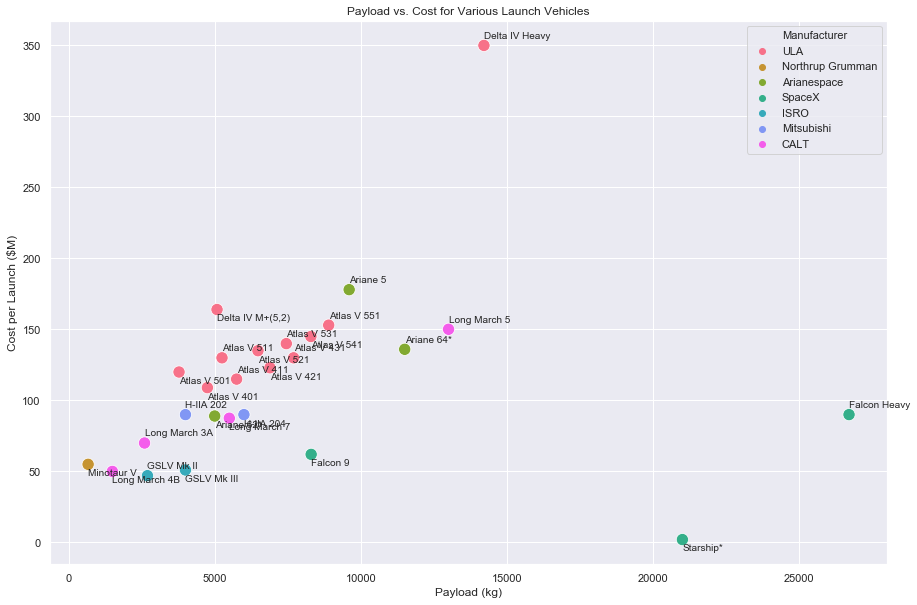

In [14]:
sns.set_palette('husl')
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot('Payload (GTO)', 'Cost per Launch ($M)', data = launch_cost_v_payload, hue = 'Manufacturer', s = 150)
plt.xlabel('Payload (kg)');
plt.title('Payload vs. Cost for Various Launch Vehicles');
for idx, data in launch_cost_v_payload.iterrows():
    if idx % 2 == 0:
        ax.text(data['Payload (GTO)'], data['Cost per Launch ($M)'] - 8, data['Launch Vehicle'], fontsize = 10)
    elif idx % 2 == 1:
        ax.text(data['Payload (GTO)'], data['Cost per Launch ($M)'] + 5, data['Launch Vehicle'], fontsize = 10)   
            

In [15]:
ratio = launch_cost_v_payload['Payload (GTO)']/launch_cost_v_payload['Gross Mass (kg)']*100
ratio = ratio.round(3)
launch_cost_v_payload['Payload Fraction'] = ratio
price_ratio = (launch_cost_v_payload['Cost per Launch ($M)']/launch_cost_v_payload['Payload (GTO)'])*10e5
price_ratio = price_ratio.round(2)
launch_cost_v_payload['Price per kg ($/kg)'] = price_ratio


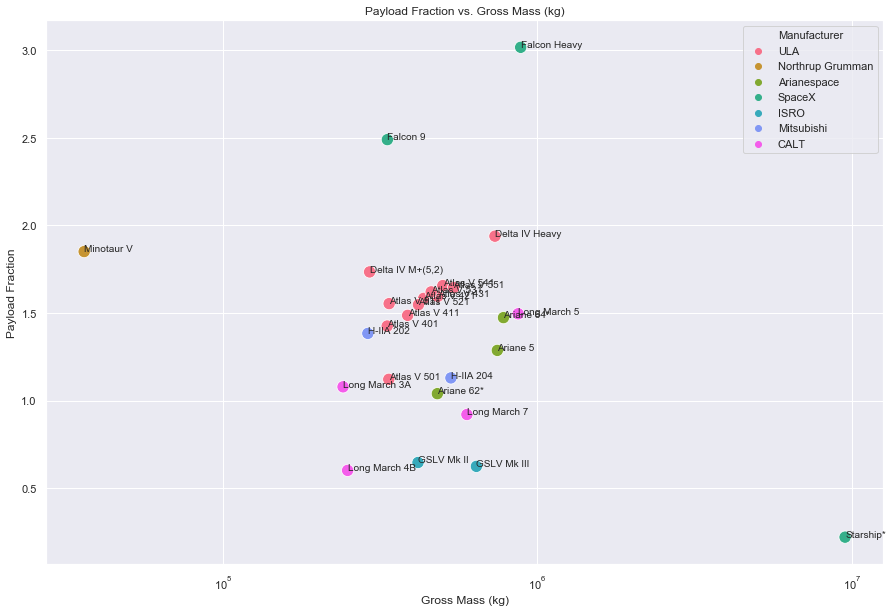

In [16]:
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot('Gross Mass (kg)', 'Payload Fraction', data = launch_cost_v_payload, 
                     s = 150, hue = 'Manufacturer')
plt.xscale('log')
plt.xlabel('Gross Mass (kg)');
plt.ylabel('Payload Fraction')
plt.title('Payload Fraction vs. Gross Mass (kg)');
for idx, data in launch_cost_v_payload.iterrows():
    ax.text(data['Gross Mass (kg)'], data['Payload Fraction'], data['Launch Vehicle'], fontsize = 10)

Note: Generally speaking, the larger (by mass) a launch vehicle is, the more payload it can take up into space. For example, Falcon Heavy (one of the heavier rockets) can take up 3% of its weight as payload where as Long March 4B (one of the lightest rockets) can take up less than 1% of its weight as payload.

In [17]:
older_launch_systems = pd.DataFrame()

older_launch_systems['Manufacturer'] = ['Arianespace', 
                                       'ULA', 'ULA', 'ULA', 'ULA', 'ULA',
                                       'Nissan',
                                       'NASA',
                                       'Lockheed', 'Lockheed', 'Lockheed']
older_launch_systems['Commercial'] = [0,
                                     1, 1, 1, 1, 1,
                                     1, 
                                     0, 
                                     1, 1, 1]

older_launch_systems['Launch Vehicle'] = ['Ariane 4',
                                         'Atlas 2', 'Atlas 3B', 'Delta 2000', 'Delta III 8000', 'Delta 5000',
                                         'M-V',
                                         'Space Shuttle',
                                         'Titan IIIC', 'Titan 34D', 'Titan IV']

older_launch_systems['Year'] = [1989,
                               1993, 2002, 1974, 1998, 1989,
                               2000,
                               1981,
                               1965, 1982, 1984]

#Delta III 8000: https://www.spaceline.org/rocketsum/delta-III-8000-series.html
#Soyuz M: http://www.astronautix.com/s/soyuzm.html
#Space Shuttle: https://www.nasa.gov/centers/kennedy/about/information/shuttle_faq.html#8

older_launch_systems['Payload (GTO)'] = [4720,
                                        3719, 4500, 724, 3810, 1405, 
                                        1280,
                                        10890,
                                        3000, 5000, 6350]

older_launch_systems['Cost per Launch ($M)'] = [153.23,
                                    132.8, 159.7, 57.90, 122.94, 82.78,
                                    71.65,
                                    450,
                                    250.93, 362.8, 546.38]

older_launch_systems['Gross Mass (kg)'] = [240000, 
                                          234000, 218588, 130392, 301450, 201580,
                                          140000, 
                                           2029663,
                                          626190, 723490, 886420]

In [18]:
ratio_older = older_launch_systems['Payload (GTO)']/older_launch_systems['Gross Mass (kg)']*100
ratio_older = ratio_older.round(3)
price_ratio_older = (older_launch_systems['Cost per Launch ($M)']/older_launch_systems['Payload (GTO)'])*10e5
price_ratio_older = price_ratio_older.round(2)
older_launch_systems['Payload Fraction'] = ratio_older
older_launch_systems['Price per kg ($/kg)'] = price_ratio_older

In [19]:
all_launch_systems = pd.concat([launch_cost_v_payload, older_launch_systems]).reset_index(drop = True)
all_launch_systems

,Manufacturer,Commercial,Launch Vehicle,Year,Payload (GTO),Cost per Launch ($M),Gross Mass (kg),Payload Fraction,Price per kg ($/kg)
0,ULA,1,"Delta IV M+(5,2)",2002,5080,164.00,292732,1.735,32283.46
1,ULA,1,Delta IV Heavy,2004,14210,350.00,733000,1.939,24630.54
2,ULA,1,Atlas V 401,2002,4750,109.00,333000,1.426,22947.37
3,ULA,1,Atlas V 411,2006,5750,115.00,386800,1.487,20000.00
4,ULA,1,Atlas V 421,2007,6890,123.00,435000,1.584,17851.96
5,ULA,1,Atlas V 431,2005,7700,130.00,482500,1.596,16883.12
6,ULA,1,Atlas V 501,2010,3780,120.00,336895,1.122,31746.03
7,ULA,1,Atlas V 511,2020,5250,130.00,337805,1.554,24761.90
8,ULA,1,Atlas V 521,2003,6480,135.00,418725,1.548,20833.33
9,ULA,1,Atlas V 531,2010,7450,140.00,459545,1.621,18791.95


In [115]:
all_launch_systems.to_csv('all_launch_systems_data.csv', index = False)

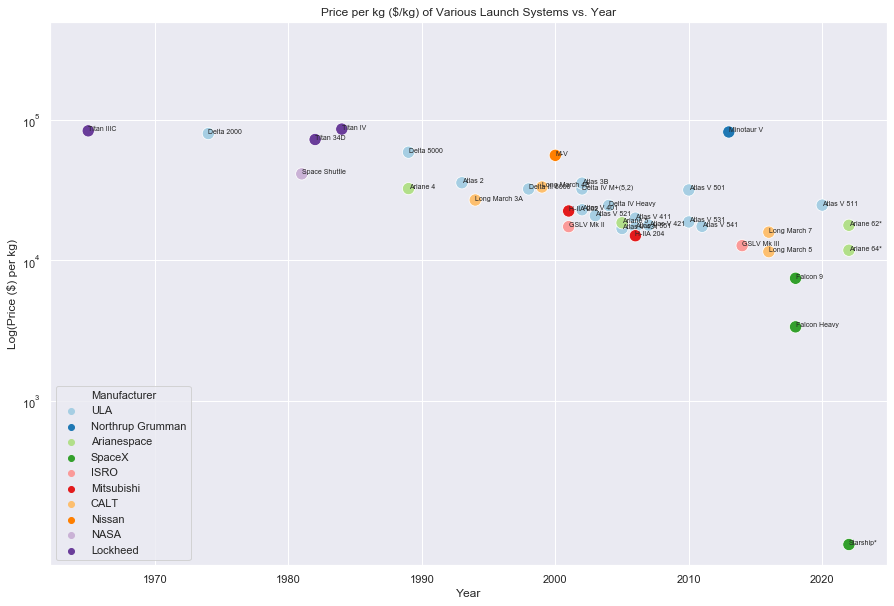

In [27]:
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot('Year', 'Price per kg ($/kg)', data = all_launch_systems, 
                     s = 150, hue = 'Manufacturer')
plt.xlabel('Year');
plt.ylabel('Log(Price ($) per kg)')
plt.yscale('log')
plt.ylim([0,5e5])
plt.yticks([1e3,1e4,1e5])
plt.title('Price per kg ($/kg) of Various Launch Systems vs. Year');
ax.legend(loc = 'lower left')
for idx, data in all_launch_systems.iterrows():
    ax.text(data['Year'], data['Price per kg ($/kg)'], data['Launch Vehicle'], fontsize = 7)

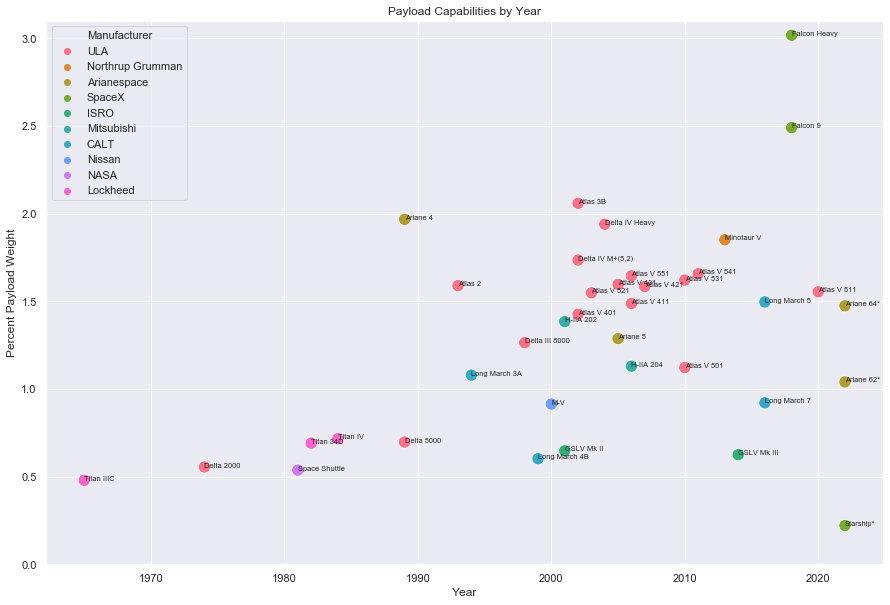

In [22]:
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot('Year', 'Payload Fraction', data = all_launch_systems, 
                     s = 150, hue = 'Manufacturer')
plt.xlabel('Year');
plt.ylabel('Percent Payload Weight')
plt.title('Payload Capabilities by Year');
plt.ylim([0,3.1])
for idx, data in all_launch_systems.iterrows():
    ax.text(data['Year'], data['Payload Fraction'], data['Launch Vehicle'], fontsize = 7.5)

In [23]:
#defining the exponential equation
def exponential(a, b, x):
    return a*np.exp(b*x)

min_year = min(all_launch_systems['Year']) - 5
max_year = max(all_launch_systems['Year']) + 5
years = np.linspace(min_year, max_year, (max_year - min_year)+1)

#fitting line for all points
c = all_launch_systems['Payload Fraction']
x = all_launch_systems['Year']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, np.log(c))
predicted_capabilities = exponential(np.exp(intercept), slope, years)

#fitting line for national space agencies 
commercial = list(all_launch_systems[all_launch_systems['Commercial'] == 1].index)
c_non_com = all_launch_systems.drop(commercial)['Payload Fraction'] #dropping all commercial indices
x_non_com = all_launch_systems.drop(commercial)['Year']
slope_non_com, intercept_non_com, r_value_non_com, p_value_non_com, std_err_non_com = stats.linregress(x_non_com, np.log(c_non_com))
predicted_capabilities_non_com = exponential(np.exp(intercept_non_com), slope_non_com, years)
slope_non_com = round(slope_non_com, 3)

#fitting line for commercial companies (e.g., SpaceX, Lockheed, etc)
non_commercial = list(all_launch_systems[all_launch_systems['Commercial'] == 0].index)
c_com = all_launch_systems.drop(non_commercial)['Payload Fraction'] #dropping all non-commercial indices
x_com = all_launch_systems.drop(non_commercial)['Year']
slope_com, intercept_com, r_value_com, p_value_com, std_err_com = stats.linregress(x_com, np.log(c_com))
predicted_capabilities_com = exponential(np.exp(intercept_com), slope_com, years)
slope_com = round(slope_com, 3)

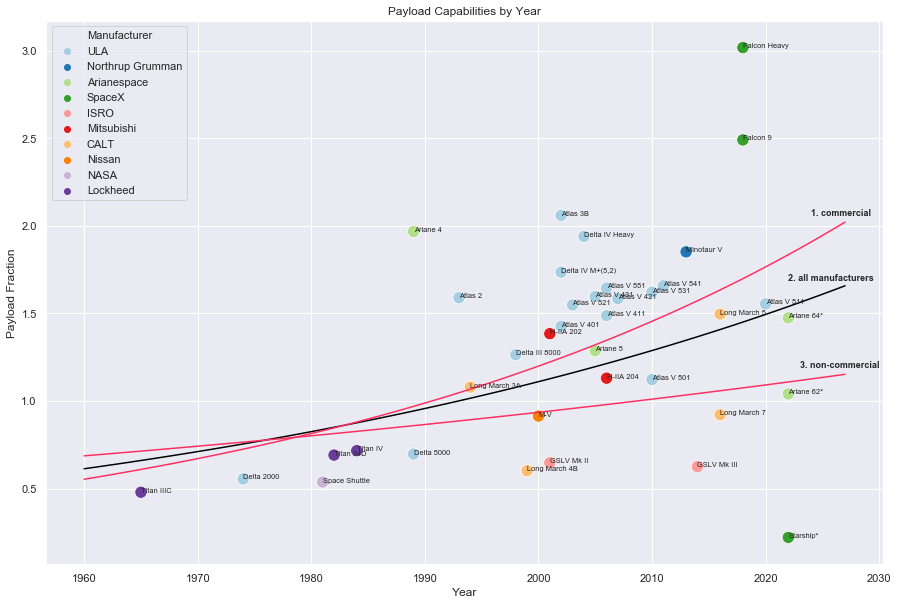

In [24]:
sns.set_palette('Paired',10)
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot('Year', 'Payload Fraction', data = all_launch_systems, 
                     s = 150, hue = 'Manufacturer')
ax = sns.lineplot(years, predicted_capabilities, color = 'black')
ax = sns.lineplot(years, predicted_capabilities_non_com, color = '#ff3060')
ax = sns.lineplot(years, predicted_capabilities_com, color = '#ff3060')
#ax.lines[1].set_linestyle('dashed')
#ax.lines[2].set_linestyle('dotted')
plt.legend(loc = 'upper left')
plt.xlabel('Year');
plt.ylabel('Payload Fraction')
plt.title('Payload Capabilities by Year');
for idx, data in all_launch_systems.iterrows():
    ax.text(data['Year'], data['Payload Fraction'], data['Launch Vehicle'], fontsize = 7.5)
ax.text(2024, predicted_capabilities_com[-1] + 0.04, '1. commercial', fontsize = 9, weight='bold');
ax.text(2022, predicted_capabilities[-1] + 0.03, '2. all manufacturers', fontsize = 9, weight='bold');
ax.text(2023, predicted_capabilities_non_com[-1] + 0.04, '3. non-commercial', fontsize = 9, weight='bold');
plt.savefig('payload_fraction_fitted_lines.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

In [96]:
#fitting a line to the price vs year figure
min_year = min(all_launch_systems['Year'])
max_year = max(all_launch_systems['Year']) + 28
years = np.linspace(min_year, max_year, (max_year - min_year)+1)

p = all_launch_systems['Price per kg ($/kg)']
x = all_launch_systems['Year']
slope_p, intercept_p, r_value_p, p_value_p, std_err_p = stats.linregress(x_without_star, np.log(p_without_star))
predicted_price = exponential(np.exp(intercept_p), slope_p, years)

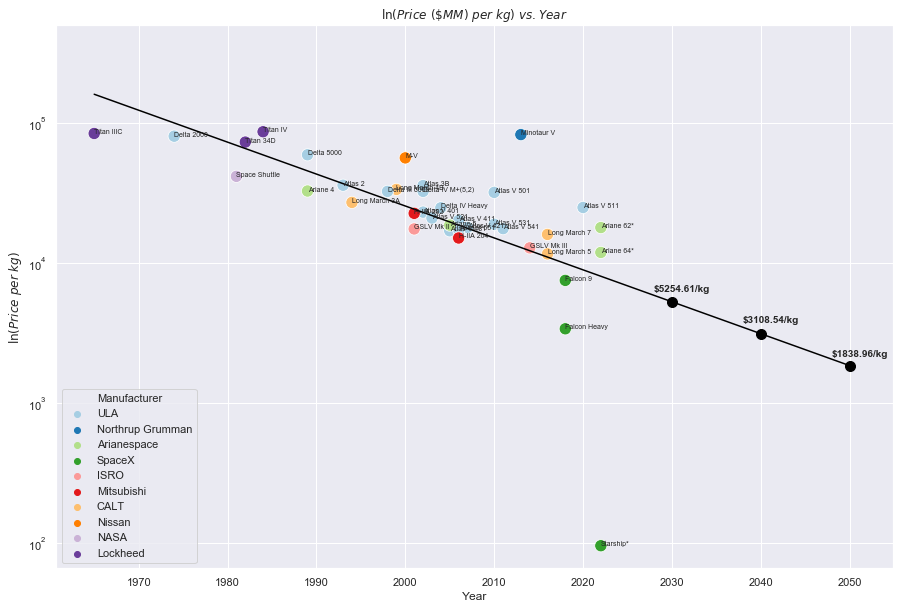

In [92]:
sns.set_palette('Paired', 10)
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot('Year', 'Price per kg ($/kg)', data = all_launch_systems, 
                     s = 150, hue = 'Manufacturer')
ax = sns.lineplot(years, predicted_price, color = 'black')

predicted_x = [2030, 2040, 2050]
predicted_y = [predicted_price[65], predicted_price[75], predicted_price[85]]

plt.xlabel(r'Year');
plt.ylabel(r'$\ln(Price\ per\ kg)$')
plt.title(r'$\ln(Price\ (\$MM)\ per\ kg)\ vs. Year$')
plt.xticks(np.linspace(1960, 2060, 11))
plt.yscale('log')
plt.ylim([0,5e5])
plt.yticks([1e2, 1e3,1e4,1e5])
ax.legend(loc = 'lower left')
for idx, data in all_launch_systems.iterrows():
    ax.text(data['Year'], data['Price per kg ($/kg)'], data['Launch Vehicle'], fontsize = 7)
ax.text(2028, predicted_y[0] + 1000, '${}/kg'.format(str(round(predicted_y[0],2))), fontsize = 10, weight = 'bold');
ax.text(2038, predicted_y[1] + 600, '${}/kg'.format(str(round(predicted_y[1],2))), fontsize = 10, weight = 'bold');
ax.text(2048, predicted_y[2] + 300, '${}/kg'.format(str(round(predicted_y[2],2))), fontsize = 10, weight = 'bold');
ax = plt.scatter(predicted_x, predicted_y, marker = 'o', s = 100, c = 'black')
plt.savefig('ln_price_vs_year.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)
